# Canny Edge Detector
$p.30 \sim p.53$

1. Gaussian filter
2. Find the intensity gradient of the image

  a. Apply a pair of convolution masks

  ![](https://i.imgur.com/EiYaObX.png)

  b. Find the gradient strength and direction with:

  ![](https://i.imgur.com/U5FEiKe.png)

3. Non-maximum Suppression
4. Thresholding edges
5. Hysteresis: The final step. Canny does use two thresholds (upper and lower):
>If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
If a pixel gradient value is below the lower threshold, then it is rejected.
If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.
Canny recommended a upper:lower ratio between 2:1 and 3:1.

[Canny Edge Detector](https://docs.opencv.org/master/da/d5c/tutorial_canny_detector.html)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Class')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


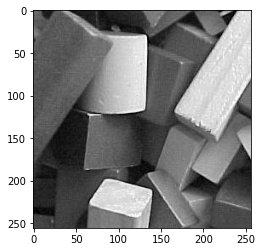

image.shape:  (256, 256)


In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

img_org = cv2.imread("blocks.jpg",0)
plt.imshow(img_org ,cmap='gray')
plt.show()
print('image.shape: ', img_org.shape)


## Step 1. Gaussian filter

original shape:  (256, 256)
gaussian shape:  (256, 256)


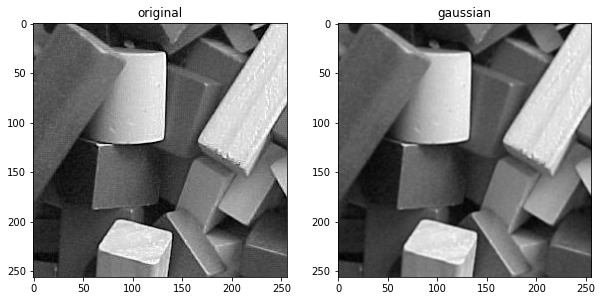

In [ ]:
def padding_img(img,k_size,style='edge'):
  # ------------ To do ------------- #
  

def gaussian_kernel(size):
  # ------------ To do ------------- #

KernelSize = 3
def Gaussian_Filter(KernelSize,image):
    row,col =image.shape
    Gaussian_Kernel = gaussian_kernel(KernelSize)

    resx=np.zeros((row,col),np.uint8)
    padimg = padding_img(image,(KernelSize-1)//2,style='reflect')

    # ------------ To do ------------- #

    return resx

## Step 2. Filter image with derivative of Gaussian
![](https://i.imgur.com/G4e6Z4n.png)

In [ ]:
def sobel(img, filtering_type):
    h, w = img.shape

    horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
        
    Gx = np.zeros((h - 2, w - 2))
    Gy = np.zeros((h - 2, w - 2))

    # ------------ To do ------------- #
    
    return output, angle


def iterate_regions(img, kernel_size):
    h, w = img.shape
    for i in range(h - kernel_size + 1):
        for j in range(w - kernel_size + 1):
            img_region = img[i:(i + kernel_size), j:(j + kernel_size)]
            yield img_region, i, j



gaussian shape:  (256, 256)
Horizontal Sobel filter shape:  (256, 256)
Vertical Sobel filter shape:  (256, 256)
Gradient amplitude shape:  (256, 256)


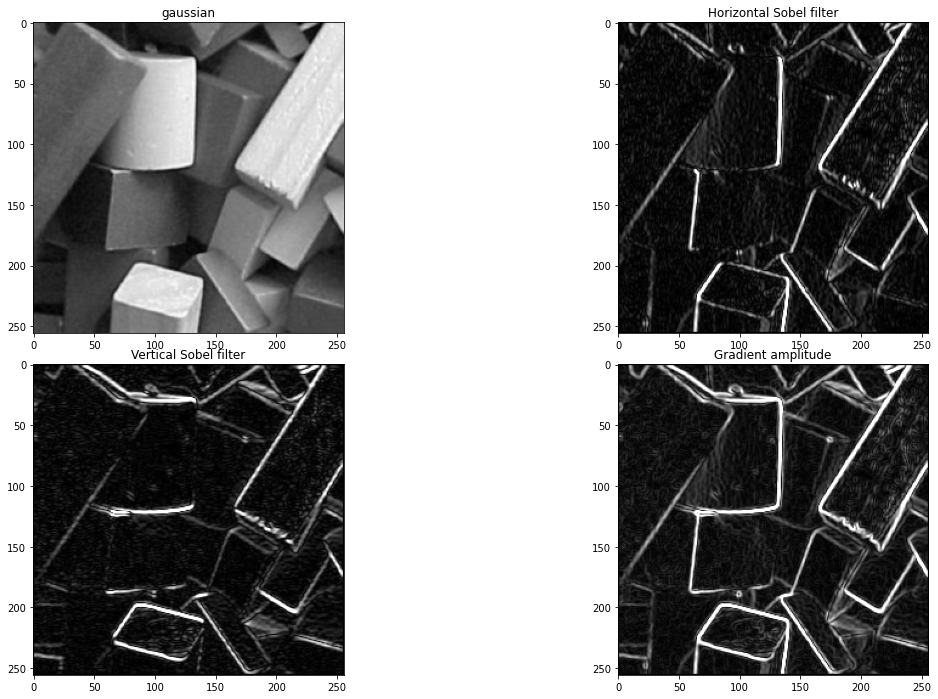

In [ ]:
# ------------ To do ------------- #


## Step 3. Non-maximum Suppression
Non maximum suppression without interpolation requires us to divide the 3x3 grid of pixels into 8 sections. Ie. if the gradient direction falls in between the angle -22.5 and 22.5, then we use the pixels that fall between this angle (r and q) as the value to compare with pixel p, see image below.

![](https://i.imgur.com/55DLrWn.png)

In [ ]:
def non_maximum_suppression(gradient,angle):
    gradient_copy = gradient.copy()
    height,width= gradient.shape
    for j in range(1, height-1):
        for i in range(1, width-1):
            # ------------ To do ------------- #
           
      
    return gradient_copy

gradient,angle = sobel(img, 'magnitude')
After_non_maximum_supression = non_maximum_suppression(gradient,angle)


[[ 0.          5.65685425  2.82842712 ... 16.55294536 10.77032961
   0.        ]
 [ 0.         11.40175425 11.66190379 ... 18.86796226 15.03329638
   0.        ]
 [ 0.          3.16227766  5.83095189 ...  9.05538514  3.16227766
   0.        ]
 [ 0.         14.2126704   3.16227766 ... 13.41640786  8.60232527
   0.        ]
 [ 0.         18.38477631 11.04536102 ...  9.05538514 10.77032961
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


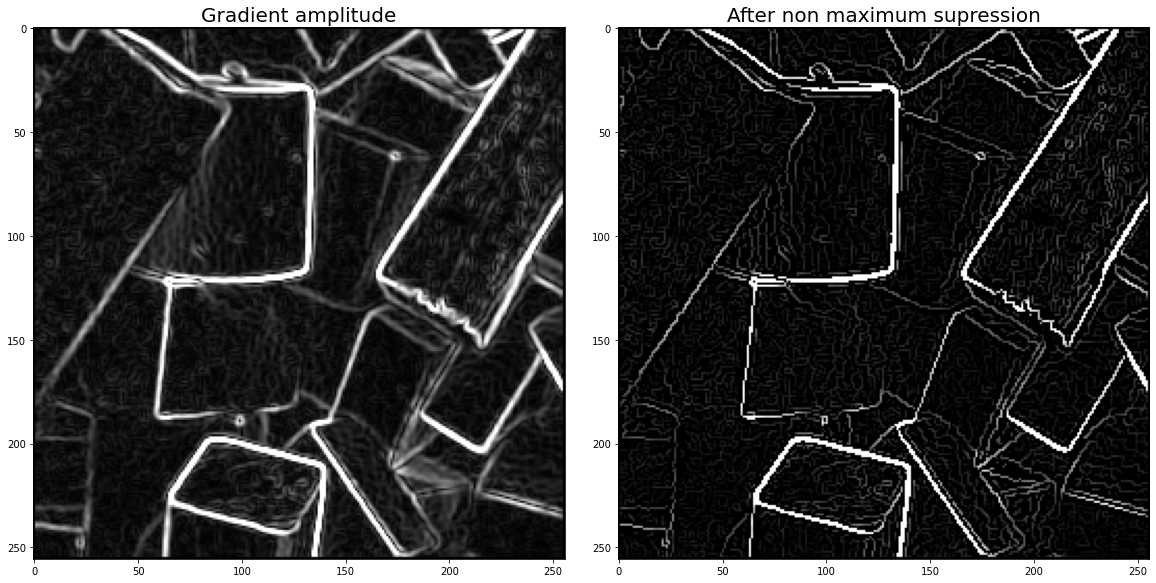

In [ ]:
# ------------ To do ------------- #


## Step 4. Thresholding edges

In [ ]:
def seperate(img, minimum = 60, maximum = 180):
    # ------------ To do ------------- #
    
thresholding = seperate(After_non_maximum_supression, minimum = 15, maximum = 90)

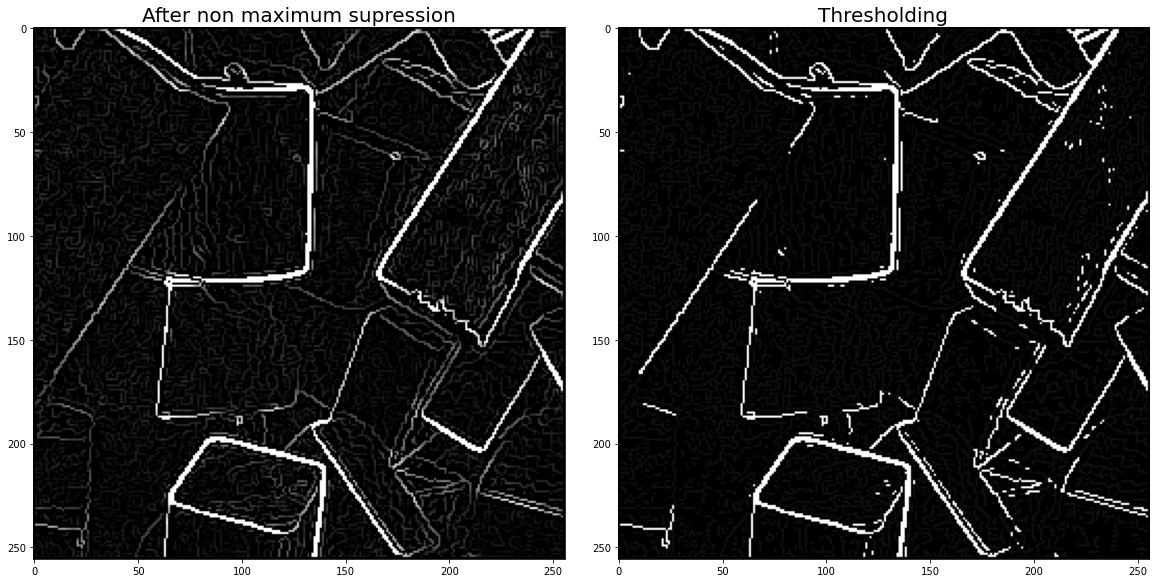

In [ ]:
# ------------ To do ------------- #


## Step 5. Hysteresis

In [ ]:
def Connect(img,weak=60):
  # ------------ To do ------------- #
  return output
dst_img = Connect(thresholding,weak)


<Figure size 1440x864 with 0 Axes>

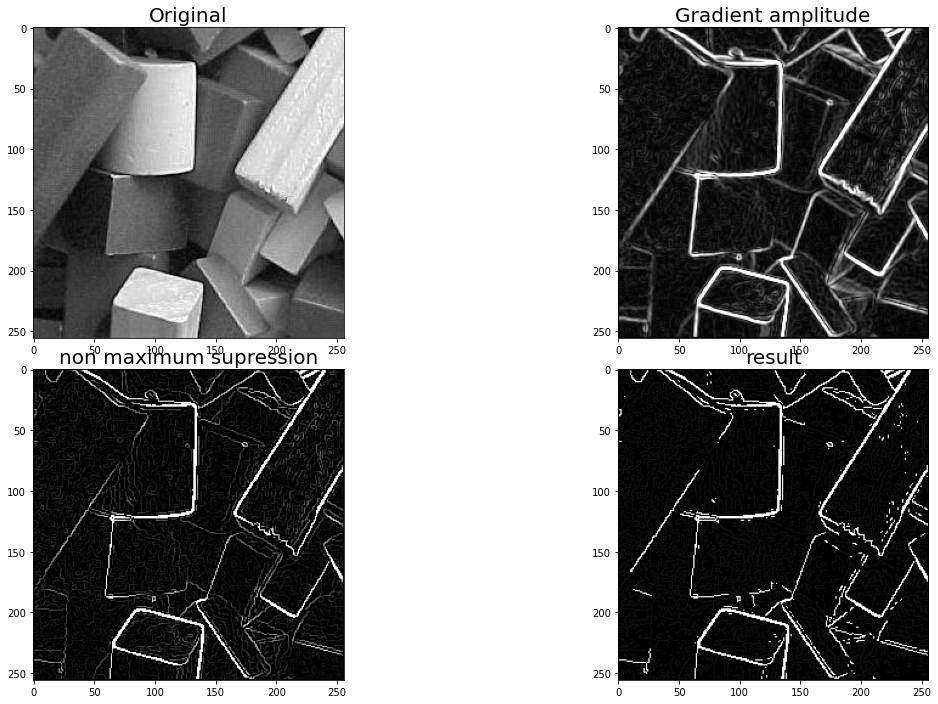

In [ ]:
# ------------ To do ------------- #


## Canny Edge OpenCV 套件


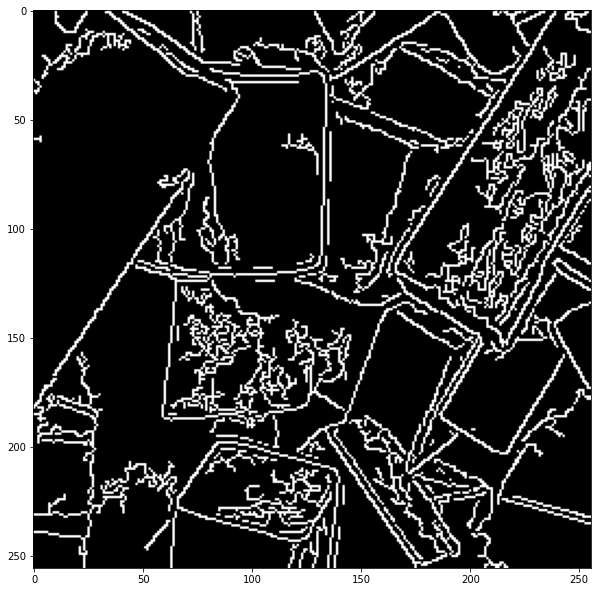

In [ ]:
low_threshold = 15
high_threshold = 90
kernel_size = 3
#這邊較低的threshold用於檢測圖像中明顯的邊緣，較高的threshold則將間斷的邊緣連接起來。
plt.figure(figsize=(10,18))
img2 = cv2.imread("blocks.jpg",0)
gray_blur = cv2.GaussianBlur(img2,(kernel_size, kernel_size),0)
edges = cv2.Canny(gray_blur, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')
plt.show()

## 加分討論：為什麼和套件不一樣？

因為...

# 加分題目 : Dilation (膨脹) & Erosion (侵蝕)

## Dilation (膨脹)

In [ ]:
def Dilation(img, kernel):
  row, col = img.shape
  dilation_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2, channel = 1)

  # -------- To do ------------- #

  # ------------------------------- #    
  return dilation_img

res = Dilation(image, get_kernel('dilation', kernel_size = 3))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('dilation')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('dilation shape: ', res.shape)

## Erosion (侵蝕)

In [ ]:
def Erosion(img, kernel):
  row, col = img.shape
  erosion_img = np.zeros((row, col))
  kernelsize = kernel.shape[0]
  img = padding_img(img, (kernelsize-1)//2, channel = 1)

  # -------- To do ------------- #

  # ------------------------------- #
  return erosion_img

res = Erosion(image, get_kernel('erosion', kernel_size = 3))

plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image, cmap = 'gray')
plt.subplot(1,2,2)
plt.title('erosion')
plt.imshow(res, cmap = 'gray')
plt.show()

print('original shape: ', image.shape)
print('erosion shape: ', res.shape)